# 1.Import Libraries

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 2.Load the dataset into the tool

In [12]:
import os
os.chdir("./Desktop/")

In [14]:
abalone = pd.read_csv('abalone.csv')

In [15]:
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
abalone.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [18]:
abalone['age'] = abalone['Rings']+1.5
abalone = abalone.drop('Rings', axis = 1)

# 3.a)Univariate Analysis

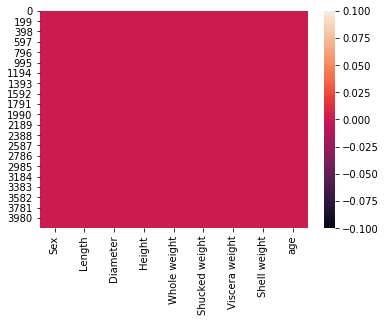

In [19]:
sns.heatmap(abalone.isnull())

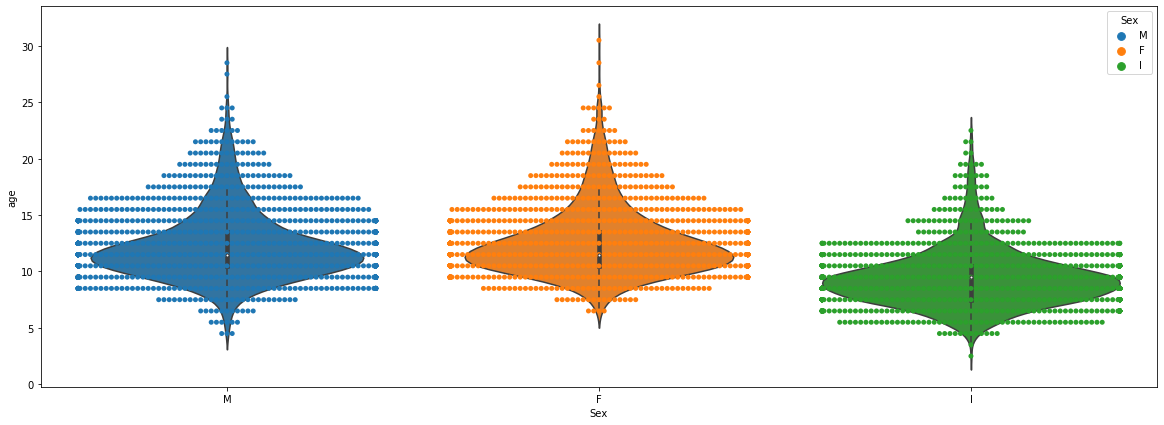

In [20]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = abalone, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age',data = abalone)

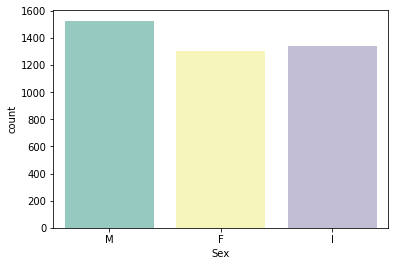

In [22]:
sns.countplot(x = 'Sex', data = abalone, palette = 'Set3')

# 3.b)Bivariate Analysis

In [23]:
numerical_features = abalone.select_dtypes(include = [np.number]).columns
categorical_features = abalone.select_dtypes(include = [np.object]).columns

In [24]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [25]:
categorical_features

Index(['Sex'], dtype='object')

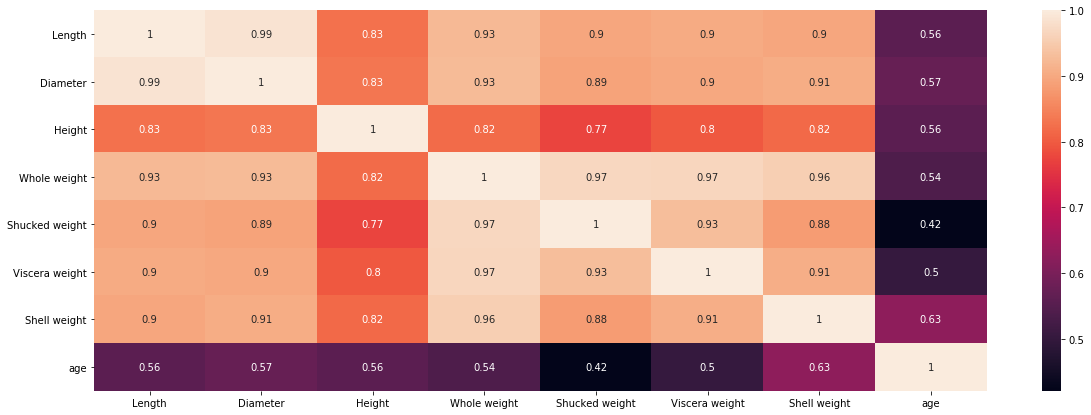

In [26]:
plt.figure(figsize = (20,7))
sns.heatmap(abalone[numerical_features].corr(),annot = True)


# 3.c)Multivariate Analysis

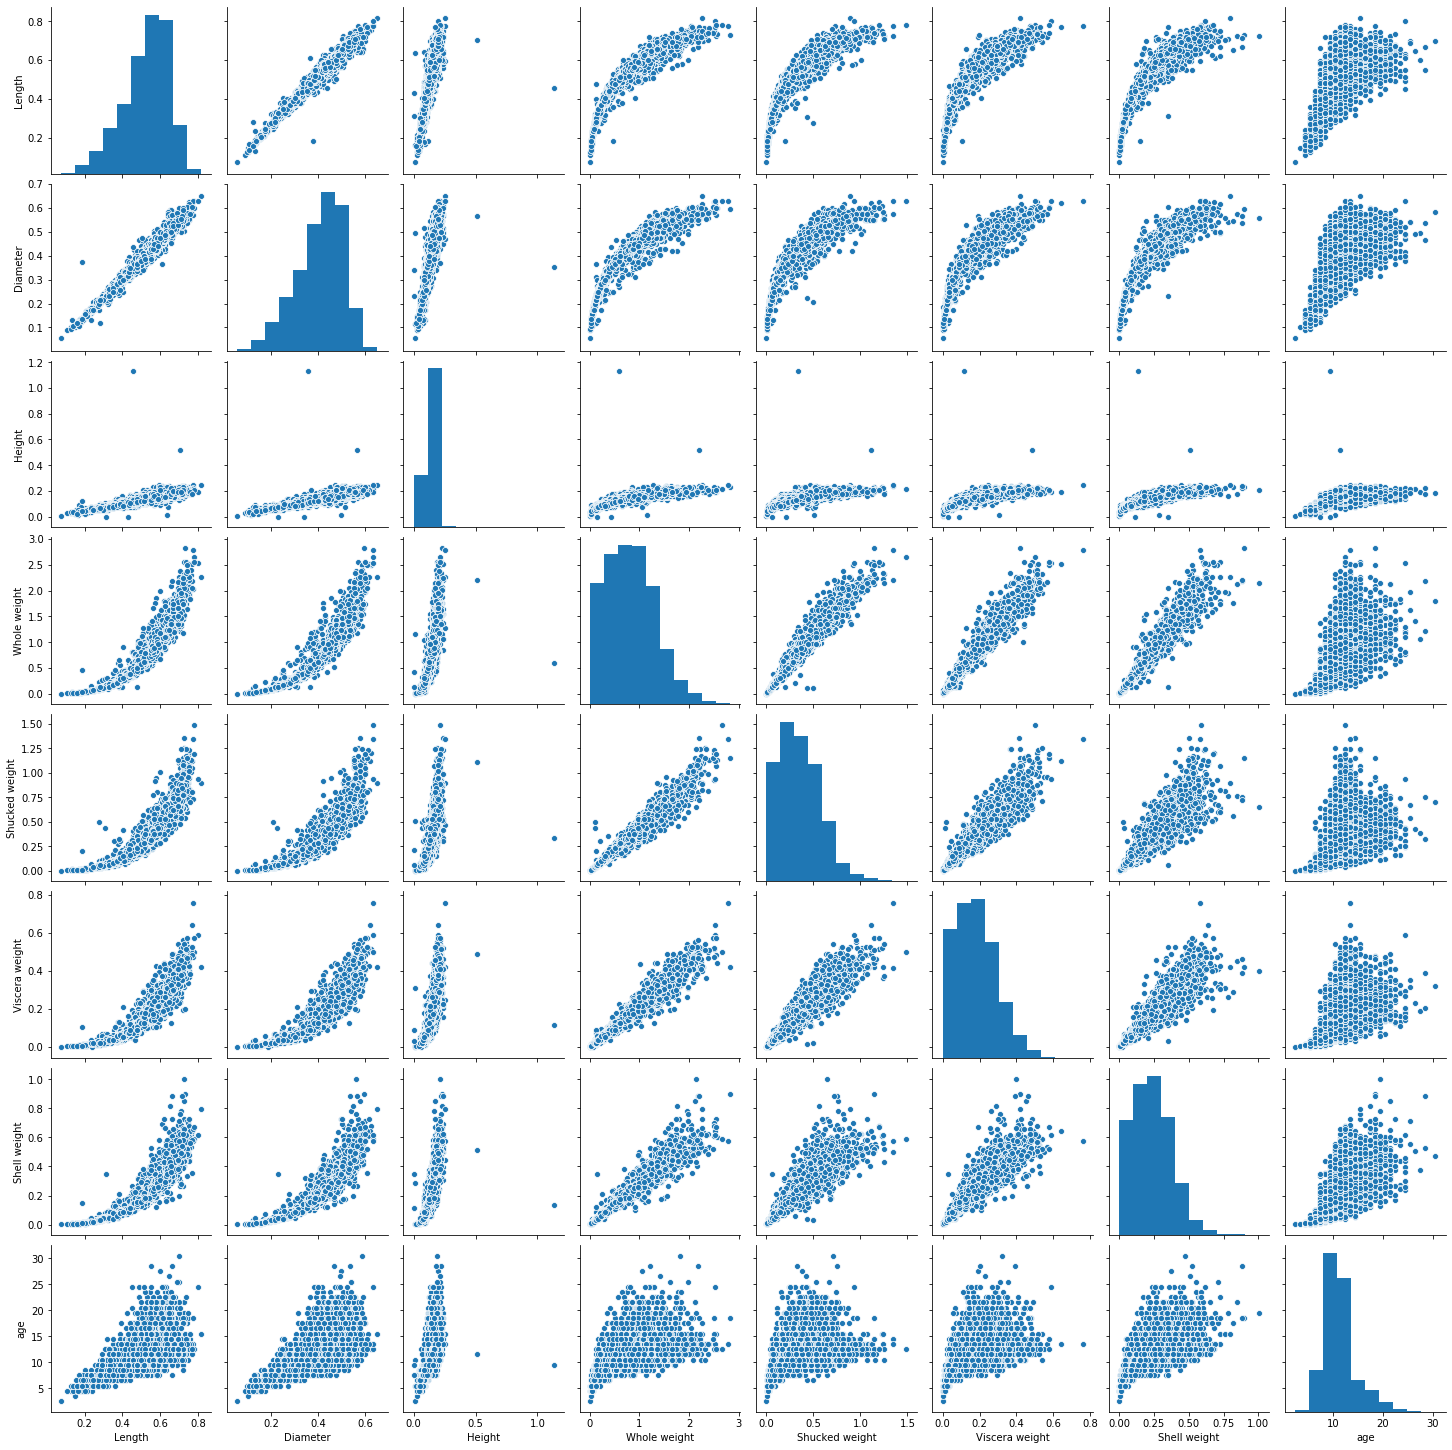

In [28]:
sns.pairplot(abalone)

# 4.Perform descriptive statistics on the dataset.

In [29]:
abalone['Length'].describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

In [30]:
abalone['Shucked weight'].describe()

count    4177.000000
mean        0.359367
std         0.221963
min         0.001000
25%         0.186000
50%         0.336000
75%         0.502000
max         1.488000
Name: Shucked weight, dtype: float64

In [31]:
abalone['Shell weight'].describe()

count    4177.000000
mean        0.238831
std         0.139203
min         0.001500
25%         0.130000
50%         0.234000
75%         0.329000
max         1.005000
Name: Shell weight, dtype: float64

In [32]:
abalone['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [33]:
abalone['Sex'].describe()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object

In [34]:
abalone['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [35]:
abalone['Length'].kurtosis()

0.06462097389494126

In [36]:
abalone['Length'].skew()

-0.639873268981801

In [37]:
abalone['Shucked weight'].kurtosis()

0.595123678369422

In [38]:
abalone['Shucked weight'].skew()

0.7190979217612694

# 5. Check for Missing values and deal with them.

In [39]:
missing_values = abalone.isnull().sum()

In [40]:
missing_values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [41]:
missing_values = abalone.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(abalone))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
age,0,0.0
Shell weight,0,0.0
Viscera weight,0,0.0
Shucked weight,0,0.0
Whole weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


# 6. Find the outliers and replace them outliers

In [42]:
abalone = pd.get_dummies(abalone)
dummy_df = abalone

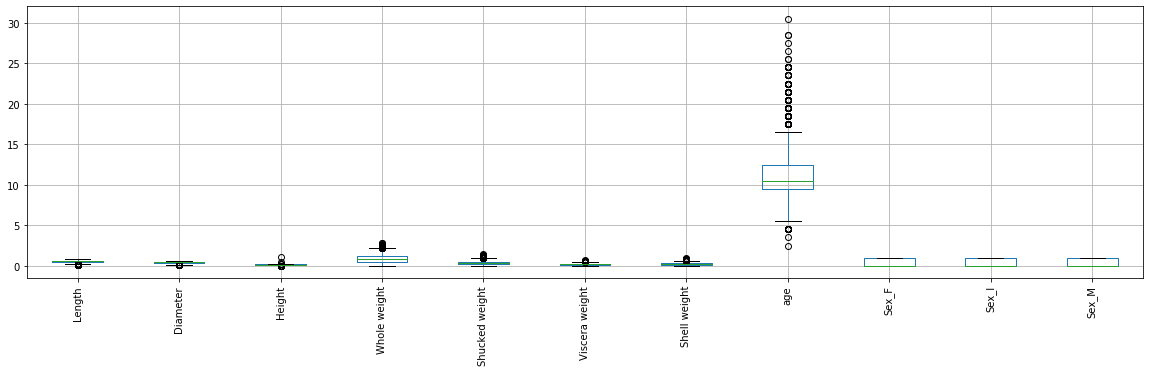

In [43]:
abalone.boxplot( rot = 90, figsize=(20,5))

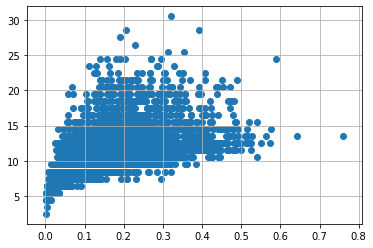

In [44]:
var = 'Viscera weight'
plt.scatter(x = abalone[var], y = abalone['age'])
plt.grid(True)

In [45]:
abalone.drop(abalone[(abalone['Viscera weight']> 0.5) & (abalone['age'] < 20)].index, inplace=True)
abalone.drop(abalone[(abalone['Viscera weight']<0.5) & (abalone['age'] > 25)].index, inplace=True)

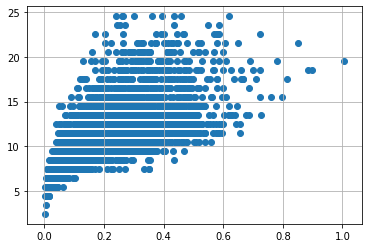

In [46]:
var = 'Shell weight'
plt.scatter(x = abalone[var], y = abalone['age'])
plt.grid(True)

In [47]:
abalone.drop(abalone[(abalone['Shell weight']> 0.6) & (abalone['age'] < 25)].index, inplace=True)
abalone.drop(abalone[(abalone['Shell weight']<0.8) & (abalone['age'] > 25)].index, inplace=True)

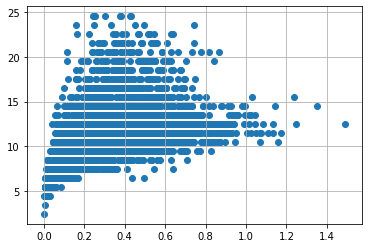

In [48]:
var = 'Shucked weight'
plt.scatter(x = abalone[var], y = abalone['age'])
plt.grid(True)

In [49]:
abalone.drop(abalone[(abalone['Shucked weight'] >= 1) & (abalone['age'] < 20)].index, inplace = True)
abalone.drop(abalone[(abalone['Viscera weight']<1) & (abalone['age'] > 20)].index, inplace = True)

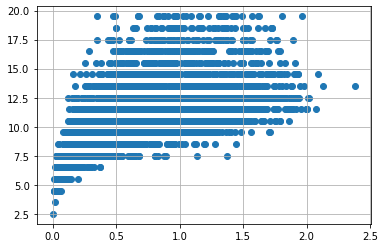

In [50]:
var = 'Whole weight'
plt.scatter(x = abalone[var], y = abalone['age'])
plt.grid(True)


In [51]:
abalone.drop(abalone[(abalone['Whole weight'] >= 2.5) & (abalone['age'] < 25)].index, inplace = True)
abalone.drop(abalone[(abalone['Whole weight']<2.5) & (abalone['age'] > 25)].index, inplace = True)

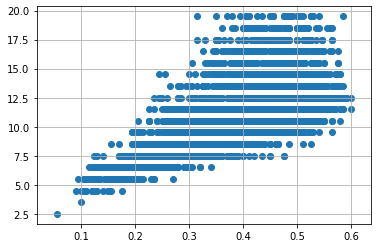

In [52]:
var = 'Diameter'
plt.scatter(x = abalone[var], y = abalone['age'])
plt.grid(True)

In [53]:
abalone.drop(abalone[(abalone['Diameter'] <0.1) & (abalone['age'] < 5)].index, inplace = True)
abalone.drop(abalone[(abalone['Diameter']<0.6) & (abalone['age'] > 25)].index, inplace = True)
abalone.drop(abalone[(abalone['Diameter']>=0.6) & (abalone['age'] < 25)].index, inplace = True)

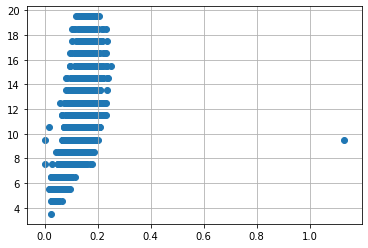

In [54]:
var = 'Height'
plt.scatter(x = abalone[var], y = abalone['age'])
plt.grid(True)

In [55]:
abalone.drop(abalone[(abalone['Height'] > 0.4) & (abalone['age'] < 15)].index, inplace = True)
abalone.drop(abalone[(abalone['Height']<0.4) & (abalone['age'] > 25)].index, inplace = True)

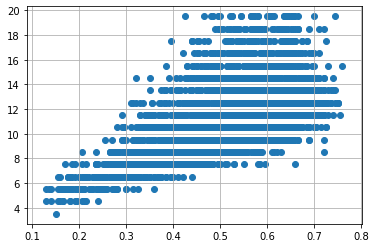

In [56]:
var = 'Length'
plt.scatter(x = abalone[var], y = abalone['age'])
plt.grid(True)

In [57]:
abalone.drop(abalone[(abalone['Length'] <0.1) & (abalone['age'] < 5)].index, inplace = True)
abalone.drop(abalone[(abalone['Length']<0.8) & (abalone['age'] > 25)].index, inplace = True)
abalone.drop(abalone[(abalone['Length']>=0.8) & (abalone['age'] < 25)].index, inplace = True)

In [58]:
abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


# 7. Check for Categorical columns and perform encoding.

In [59]:
numerical_features = abalone.select_dtypes(include = [np.number]).columns
categorical_features = abalone.select_dtypes(include = [np.object]).columns

In [60]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [61]:
categorical_features

Index([], dtype='object')

# 8. Split the data into dependent and independent variables.

In [73]:
x = abalone.iloc[:, 0:1].values

In [74]:
y = abalone.iloc[:, 1]

In [75]:
x

array([[0.455],
       [0.35 ],
       [0.53 ],
       ...,
       [0.6  ],
       [0.625],
       [0.71 ]])

In [76]:
y

0       0.365
1       0.265
2       0.420
3       0.365
4       0.255
        ...  
4172    0.450
4173    0.440
4174    0.475
4175    0.485
4176    0.555
Name: Diameter, Length: 3995, dtype: float64

# 9. Scale the independent variables

In [77]:
print ("\n ORIGINAL VALUES: \n\n", x,y) 


 ORIGINAL VALUES: 

 [[0.455]
 [0.35 ]
 [0.53 ]
 ...
 [0.6  ]
 [0.625]
 [0.71 ]] 0       0.365
1       0.265
2       0.420
3       0.365
4       0.255
        ...  
4172    0.450
4173    0.440
4174    0.475
4175    0.485
4176    0.555
Name: Diameter, Length: 3995, dtype: float64


In [78]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
new_y= min_max_scaler.fit_transform(x,y) 
print ("\n VALUES AFTER MIN MAX SCALING: \n\n", new_y)


 VALUES AFTER MIN MAX SCALING: 

 [[0.51587302]
 [0.34920635]
 [0.63492063]
 ...
 [0.74603175]
 [0.78571429]
 [0.92063492]]


# 10. Split the data into training and testing

In [79]:
X = abalone.drop('age', axis = 1)
y = abalone['age']

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [81]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

# 11. Build the Model

In [82]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
model=lm.LinearRegression()
results=model.fit(X_train,y_train) 

In [83]:
accuracy = model.score(X_train, y_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.5379345322586719


In [84]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# 12. Train the Model

In [86]:
X_train

array([[0.38 , 0.285, 0.095, ..., 0.   , 1.   , 0.   ],
       [0.35 , 0.255, 0.08 , ..., 0.   , 0.   , 1.   ],
       [0.48 , 0.395, 0.15 , ..., 0.   , 0.   , 1.   ],
       ...,
       [0.58 , 0.435, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.36 , 0.3  , 0.085, ..., 0.   , 1.   , 0.   ],
       [0.55 , 0.45 , 0.14 , ..., 0.   , 1.   , 0.   ]])

In [88]:
y_train

1546     8.5
714     10.5
3401    19.5
3512    12.5
2534    13.5
        ... 
2864     7.5
1645    11.5
1643     9.5
819      8.5
3662     9.5
Name: age, Length: 2996, dtype: float64

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

Mean Squared error of training set :3.536363


# 13. Test the Model

In [90]:
X_test

array([[0.39 , 0.315, 0.09 , ..., 0.   , 1.   , 0.   ],
       [0.64 , 0.505, 0.175, ..., 1.   , 0.   , 0.   ],
       [0.505, 0.39 , 0.185, ..., 0.   , 1.   , 0.   ],
       ...,
       [0.435, 0.35 , 0.11 , ..., 1.   , 0.   , 0.   ],
       [0.415, 0.32 , 0.11 , ..., 0.   , 1.   , 0.   ],
       [0.375, 0.285, 0.1  , ..., 0.   , 1.   , 0.   ]])

In [91]:
y_test

3408     8.5
4117    10.5
2519     8.5
2768    12.5
3490    11.5
        ... 
1679    13.5
259     14.5
2310    14.5
829      8.5
3357     9.5
Name: age, Length: 999, dtype: float64

In [92]:
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of testing set :3.641793


In [93]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

R2 Score of training set:0.54


In [94]:
from sklearn.metrics import r2_score
p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of testing set:0.52
